# PSU DS 300.002: Problem Set 2
## Differential Privacy

### Instructions
This assignment follows the same principles as our hands-on in-class activities, and centers around concepts we've discussed in our differential privacy module.

To ensure that the notebook runs, I've defined a function your_code_here() that simply returns the number 1. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to your_code_here() in place or insert dummy values so that the cell does not throw an error when it runs.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.
The point value of each question is listed with the question, and these add up to 100 points. When you have finished your assignment, please submit it via Canvas.

### Preamble

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Our usual dataset

adult_data = pd.read_csv("adult_with_pii.csv")
adult_data['DOB'] = pd.to_datetime(adult_data['DOB'], errors='coerce')
adult_data.head()

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1

## Collaboration Statement

**You are expected to work indepdently on this assignment.** Everyone should write their *own code and responses*. You may collaborate with a classmate through *high level* discussions (only). To the extent that you do so, please describe this in the collaboration statment below.

In [3]:
# In this cell (in markdown or a comment) write your collaboration statement

### Question 1 (1 point)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [2]:
mar_status_counts = adult_data['Martial Status'].value_counts()
mar_status_counts.to_frame()

,Martial Status
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


### Question 2 (3 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech` above.

In [6]:
epsilon = 1
laplace = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
dp_mar_stat = adult_data['Martial Status'].value_counts().apply(laplace)
dp_mar_stat.to_frame()


,Martial Status
Married-civ-spouse,14975.593557
Never-married,10680.518054
Divorced,4442.862642
Separated,1025.052384
Widowed,993.152036
Married-spouse-absent,419.636128
Married-AF-spouse,21.895375


### Question 3 (3 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

In the above differentially private count for marital status, the privacy cost is 1 since epsilon is equal to 1. An epsilon equal to 1 is beneifical since this would yield more accurate results. No, it does not violate privacy since it does not specifically identify individuals. It is just a generalized count of individuals with that marital status, and most individuals (including those outside the dataset) fit in one of those categories. This would not apply to all data sets since in this case most individuals fit in to one of the marital status categories. Some data sets include attributes that are more exclusive and would therefore potentially reveal specific individuals. 

### Question 4 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, then run `pct_error` on each answer to compute the percent error of that answer. The remaining code will plot histograms of the results for each status.

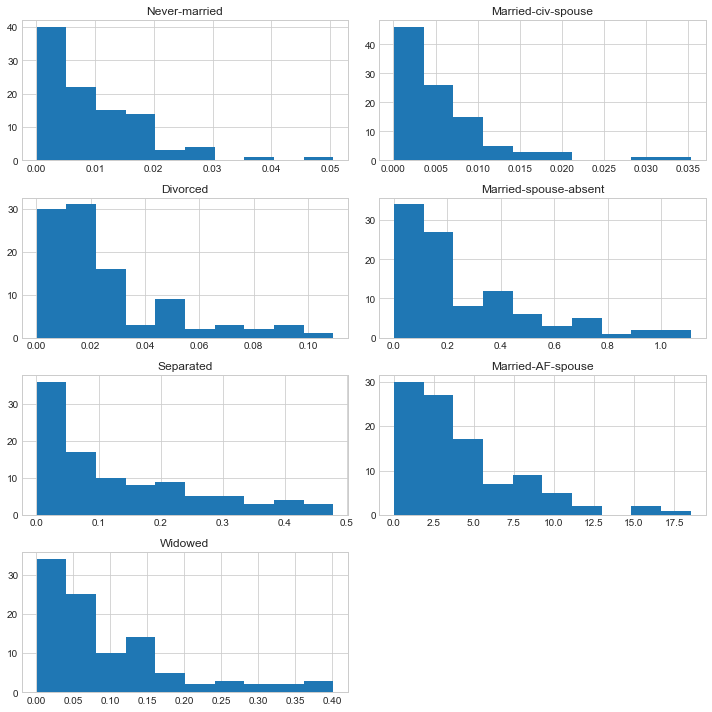

In [6]:
fig = plt.figure(figsize = (10,10))

dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    orig_vals = [mar_status_counts[status] for x in range(100)]
    errors = [pct_error(x, laplace(x)) for x in orig_vals]
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

### Question 5 (3 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

The marital status with the largest percent error is Married-AF-spouse and the marital status with the smallest percent error is Married-civ-spouse. A potential reason for this discrepancy is that Married-civ-spouse has the highest count and Married-AF-spouse has the lowest count. A potential rule of thumb could be that while epsilon is a larger count will typically yield a more accurate result.  

### Question 6 (2 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [7]:
Ctable_MarStat_Sex = pd.crosstab(adult_data['Martial Status'], adult_data['Sex'])
Ctable_MarStat_Sex

Sex,Female,Male
Martial Status,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


### Question 7 (3 points)

Write code to build a differentially private version of your result from the last question.

*Hint*: use `applymap`.

In [8]:
dp_Ctable_MarStat_Sex = Ctable_MarStat_Sex.applymap(laplace)
dp_Ctable_MarStat_Sex

Sex,Female,Male
Martial Status,,
Divorced,2672.041820,1771.177608
Married-AF-spouse,13.603838,8.251043
Married-civ-spouse,1656.559788,13319.064710
Married-spouse-absent,206.797983,213.314445
Never-married,4766.363125,5915.967318
Separated,633.037618,395.303922
Widowed,826.308565,166.616265


### Question 8 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

*Hint*: use `applymap` and `pct_error` on your answer to the last question.

In [9]:
pct_error(Ctable_MarStat_Sex, dp_Ctable_MarStat_Sex)

Sex,Female,Male
Martial Status,,
Divorced,0.001565,0.010029
Married-AF-spouse,2.829731,8.321745
Married-civ-spouse,0.026567,0.000486
Married-spouse-absent,0.877065,0.147627
Never-married,0.013360,0.000552
Separated,0.322919,0.330945
Widowed,0.158614,0.823652


### Question 9 (3 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to the last question?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

The privacy cost of the last question is 1 since this is what we set our epsilon equal to. Also the attributes are mutually exclusive and therefore are not sequential composition. Just to clarify, an epsilon of 1 yields more accurate differentially private results so utility is preserved. Accurate results are produced for Male and Female Married-civ-spouse, Female and Male Never-married, Male Seperated, Male Widowed, and Female and Male Divorced. High error results are produced for Female and Male Married-AF-spouse, Female and Male Married-spouse-absent, and Female Widowed. 

### Question 10 (5 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

*Hint*: see the documentation of `crosstab` for an example of a 3-variable contingency table.

In [10]:
Ctable_MarStat_Sex_Edu = pd.crosstab(adult_data['Martial Status'], [adult_data['Sex'], adult_data['Education']], rownames = ['Martial Status'], colnames = ['Sex', 'Education'])
tabs = Ctable_MarStat_Sex_Edu.applymap(laplace)
display(tabs)
errors = pct_error(Ctable_MarStat_Sex_Edu, tabs)
display(errors)

Sex                        Female                                    \
Education                    10th        11th       12th    1st-4th   
Martial Status                                                        
Divorced                67.198264   78.769284  18.881678   5.210442   
Married-AF-spouse       -0.989059   -0.070111  -0.269197  -2.560515   
Married-civ-spouse      35.007992   35.009393  19.174489   6.343591   
Married-spouse-absent    7.221895    8.583191   3.861284   1.783529   
Never-married          127.987434  247.319138  83.909936  10.194242   
Separated               31.649824   27.069367  12.417356   5.048714   
Widowed                 30.291359   34.128066   8.656469  14.291724   

Sex                                                                 \
Education                5th-6th    7th-8th        9th  Assoc-acdm   
Martial Status                                                       
Divorced                9.989843  33.546771  33.109127  134.506287   
Married-AF-spouse       2.234645   0.108792  -1.184894    1.942430   
Married-civ-spouse     18.732608  19.270559  24.966108   77.349325   
Married-spouse-absent   6.960529   6.150811   1.606611    7.898391   
Never-married          29.657872  33.276290  51.125910  160.334946   
Separated              10.911700  13.849986  19.683594   15.616908   
Widowed                10.983040  50.314434  16.897675   21.427775   

Sex                                            ...        Male              \
Education               Assoc-voc   Bachelors  ...         9th  Assoc-acdm   
Martial Status                                 ...                           
Divorced               152.180882  296.289094  ...   29.811409   64.859986   
Married-AF-spouse        1.240721    0.179259  ...    0.233703   -0.335696   
Married-civ-spouse      90.688259  310.581457  ...  206.493700  382.876513   
Married-spouse-absent    8.389524   31.318230  ...    4.457197    6.089154   
Never-married          176.149043  868.655929  ...  104.645739  177.257196   
Separated               26.516251   46.327629  ...   17.919503   13.863330   
Widowed                 38.534833   63.003959  ...    7.073341    1.614307   

Sex                                                                      \
Education               Assoc-voc    Bachelors   Doctorate      HS-grad   
Martial Status                                                            
Divorced                79.628188   250.915858   12.655381   673.626557   
Married-AF-spouse        0.529939     2.510502   -2.010803     4.892631   
Married-civ-spouse     596.164794  2457.180151  266.178704  4311.835448   
Married-spouse-absent    2.202514    36.552503    3.413630    59.652885   
Never-married          184.239422   926.567136   37.222923  1854.163876   
Separated               12.200780    45.166873    3.301814   137.486060   
Widowed                  1.489658    18.257170   -0.335987    66.919391   

Sex                                                                    
Education                 Masters  Preschool Prof-school Some-college  
Martial Status                                                         
Divorced                84.674830   1.353558   34.313472   357.003593  
Married-AF-spouse        0.240049  -0.847607    2.088028     2.045148  
Married-civ-spouse     890.518626  17.040935  388.148974  2496.179028  
Married-spouse-absent    7.542773   4.820585    1.433800    31.450166  
Never-married          187.971964  11.872392   56.056834  1491.415014  
Separated                9.301980  -0.760160    5.089947    89.995570  
Widowed                  8.649560   0.424521    3.891402    20.880105  

[7 rows x 32 columns]

Sex                      Female                                              \
Education                  10th       11th       12th    1st-4th    5th-6th   
Martial Status                                                                
Divorced               0.295917   0.292046  11.068693   4.208841   0.101567   
Married-AF-spouse           inf        inf        inf        inf        inf   
Married-civ-spouse     6.084824   0.026836   4.127556   5.726525   4.070045   
Married-spouse-absent  3.169931  22.617021   3.467896  40.549037  39.210574   
Never-married          0.009817   0.274541   0.107219  15.047981   2.268523   
Separated              2.096206   3.323689   3.477968   0.974281   0.802723   
Widowed                4.452963   2.491240  23.663840   4.721842   0.154183   

Sex                                                                          \
Education                7th-8th        9th Assoc-acdm Assoc-voc  Bachelors   
Martial Status                                                                
Divorced                1.656882   5.402493   1.098319  0.535371   0.436981   
Married-AF-spouse            inf        inf   2.878480       inf  91.037027   
Married-civ-spouse     16.214961  13.482307   0.453669  2.485743   0.134580   
Married-spouse-absent   2.513525  46.446290   1.270107  4.869045   2.130532   
Never-married           2.128559   2.251820   0.413077  1.039864   0.039594   
Separated               6.538355  15.785849   2.394327  8.564653   0.712238   
Widowed                 1.344247   0.601909   2.037025  1.192736   1.556313   

Sex                    ...       Male                                   \
Education              ...        9th Assoc-acdm  Assoc-voc  Bachelors   
Martial Status         ...                                               
Divorced               ...   2.797964   3.194051   1.693595   0.033523   
Married-AF-spouse      ...        inf        inf  47.006098  25.525092   
Married-civ-spouse     ...   0.724183   0.032242   0.027650   0.007332   
Married-spouse-absent  ...  25.713382  52.228851  55.949729   1.534732   
Never-married          ...   0.337392   0.714316   0.130120   0.061246   
Separated              ...  11.996893   0.976216   6.147848   1.811145   
Widowed                ...  17.889013  19.284652  25.517122   1.428723   

Sex                                                                            \
Education               Doctorate   HS-grad    Masters  Preschool Prof-school   
Martial Status                                                                  
Divorced                 2.650914  0.351101   5.843538  35.355751    0.921977   
Married-AF-spouse             inf  2.147387        inf        inf         inf   
Married-civ-spouse       0.067182  0.003816   0.058273   0.240793    0.817915   
Married-spouse-absent   14.659241  2.849801   5.715333  20.514625   28.310024   
Never-married            2.044941  0.008839   0.014913   1.063404    0.101489   
Separated               10.060460  1.092691  15.436541        inf    1.798943   
Widowed                111.199551  4.400869  13.504400  57.547920   94.570118   

Sex                                 
Education             Some-college  
Martial Status                      
Divorced                  0.278326  
Married-AF-spouse       104.514835  
Married-civ-spouse        0.047256  
Married-spouse-absent     4.833888  
Never-married             0.039208  
Separated                 1.118618  
Widowed                   4.400526  

[7 rows x 32 columns]

### Question 11 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in the last question? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in the last question different from the privacy cost in Question 7? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

The privacy cost of the contigency table is 1 since that is what we set our epsilon equal to. Once again, the attributes are mutually exclusive and therefore are not sequential composition. The privacy cost in the contigency table for 3 variables is also 1 since we used the same laplace mechanism with epsilon equal to 1 and the variables are mutually exclusive and therefore are not squential composition. The number of variables in a single contigency table does not affect privacy cost. This is because epsilon is determined before applying differentially private mechanisms to a query. So If epsilon is set at 1, then the privacy cost will remain at 1. If the variables were not mutually exclusive and therefore sequential composition, then the privacy cost would be different from epsion. An increase in the number of variables decreases the accuracy. This is probabaly because adding another variable partitions the dataset even more. This means that the count in each cell decreases which in turn could lead to a greater percent error. 

### Question 12 (2 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

In [11]:
def z_clip(xs, b):
    return xs.clip(lower = 0, upper = b)

### Question 13 (3 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

In [12]:
cg = adult_data['Capital Gain']

clipped1 = z_clip(cg, 100000)
display(clipped1.mean())

clipped2 = z_clip(cg, 90000)
display(clipped2.mean())

clipped3 = z_clip(cg, 80000)
display(clipped3.mean())

clipped4 = z_clip(cg, 70000)
display(clipped4.mean())

clipped5 = z_clip(cg, 60000)
display(clipped5.mean())

clipped6 = z_clip(cg, 50000)
display(clipped6.mean())

1077.6488437087312

1028.8223027548295

979.9908786585179

931.1594545622063

882.3280304658948

833.4966063695832

### Question 14 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and use `pct_error` to determine the error introduced for each value of `b`. 

*Note*: Your output should look something like the triple ('b', 'answer', 'pct_error').

In [13]:
dp_clipped1 = clipped1.apply(laplace)
display(dp_clipped1.mean())
display(pct_error(clipped1.mean(), dp_clipped1.mean()))

dp_clipped2 = clipped2.apply(laplace)
display(dp_clipped2.mean())
display(pct_error(clipped2.mean(), dp_clipped2.mean()))


dp_clipped3 = clipped3.apply(laplace)
display(dp_clipped3.mean())
display(pct_error(clipped3.mean(), dp_clipped3.mean()))


dp_clipped4 = clipped4.apply(laplace)
display(dp_clipped4.mean())
display(pct_error(clipped4.mean(), dp_clipped4.mean()))


dp_clipped5 = clipped5.apply(laplace)
display(dp_clipped5.mean())
display(pct_error(clipped5.mean(), dp_clipped5.mean()))


dp_clipped6 = clipped6.apply(laplace)
display(dp_clipped6.mean())
display(pct_error(clipped6.mean(), dp_clipped6.mean()))


1077.638902763549

0.0009224660927642816

1028.8162884680476

0.0005845797438309156

980.0102716579163

0.0019788959081896962

931.1516601424202

0.0008370660629549923

882.3251878265894

0.00032217488363282413

833.4994964350815

0.0003467399238554363

### Question 15 (5 points)

In 5-10 sentences, answer the following:

- In Question 13, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 14, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

When b is equal to 100000, the average is closest to the un-clipped average. This is because the max capital gain is 99999 so a clipping parameter of 100000 includes 100% of the data. The sensitivity in this case is 100000 since it is what we set our clipping parameter to and is therefore the highest possible value. When b is equal to 100000, the error is minimized the most. This is probabaly because 100% of the data in the capital gain attribute is included. The scale of  of the noise seems to be more important since this determines how differentially private the results will be. In other words, if we decreased the epsilon value, the results would be more privatized but less accurate. Therefore it is once again a tradeoff between privacy and utility. This is potentially true for every data set since the scale of noise is a function of privacy cost and this determines how much the privatized results change from the original. 

### Question 16 (10 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [14]:
epsilon = 1
def auto_avg(xs, epsilon):
    b = xs.max() + 100
    sensitivity = 1
    clipped = xs.clip(lower = 0, upper = b)
    dp_array = [v + np.random.laplace(loc=0, scale=sensitivity / epsilon) for v in clipped]
    sum_num = 0
    for i in dp_array:
        sum_num = sum_num + i
    dp_avg = sum_num/len(dp_array)
    return dp_avg
auto_avg(adult_data['Capital Gain'], epsilon)

1077.6466524726052

### Question 17 (8 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 14? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

We set the clipping parmaeter to include 100 percent of the data in any specified attribute. Apply laplace to each value in the data set and store it in an array. Epsilon and sensitivity is set to 1 such that the scale equals 1. The privacy cost would be epsilon=1 in this case since the the attributes in the adult data are mutually exclusive and therefore not sequential composition. Once the array has been compiled, we take the average of all the elements. This approach may not work for all data sets since some attributes may be unbounded.  

### Question 18 (3 points)

Consider the code below, which graphs the total privacy cost of an averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

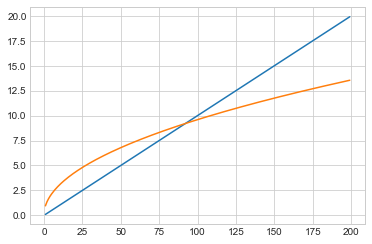

In [15]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [k * epsilon for k in xs]
privacy_cost_advanced = [2 * epsilon * np.sqrt(2 * k * np.log(1/delta_p)) for k in xs]

plt.plot(xs, privacy_cost_sequential);
plt.plot(xs, privacy_cost_advanced);

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

They cross at around (90,9.0) which implies that advanced composition should be used. This is because the graph is within the upper bound of sequential and therefore has a lower privacy cost. Sequential can be useful since it can have loosely set upper bounds but this is is not always accurate. Advanced composition can reduce privacy cost and is therefore better for multiple iterations. With this in mind, both sequential and advanced can be correct depending on the scenario and number of iterations run.

### Question 19 (3 points)

In the cell below, define a function that implements the vector version of the Laplace mechanism. An implementation that works for a single number is defined for reference as `laplace_mech` above.

In [16]:
def laplace_mech_vec(qs, sensitivity, epsilon):
    sensitivity = 1
    epsilon = .1
    return [v + np.random.laplace(loc=0, scale=sensitivity / epsilon) for v in qs]
 

### Question 20 (3 points)

In the cell below, define a function that implements the vector version of the Gaussian mechanism.

In [17]:
def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
    epsilon = .1
    delta = 10e-5
    sensitivity = np.sqrt(2 * np.log(1.25 / delta)) * 1
    sigma = sensitivity/epsilon
    return [x +np.random.normal(loc=0, scale=sigma) for x in qs]


### Question 21 (4 points)

Consider the code below, which defines three average queries and runs them on `adult_data`.

In [18]:
b_capgain = 3000
b_year = 3000
b_age = 3000

epsilon = 1
n = len(adult_data)
display(n)
def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

32561

[235.98968090660605, 2013.803599398053, 38.58164675532078]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

In [19]:
3000/32561
L1 = (3*(3000/32561)) # This is because the clipping parameter is 3000 for all 3 queries and they are all from the same data set so n is the same for all 3 queries. 
L2 = (3*((3000/32561)**2))**(0.5) # This is similar to L1 in the sense that clipping parameter, number of queries, and length of data is taken into account.
# In the case of L2 the sensitivity is calculated to a reduced value. 
display(L1)
display(L2)


0.27640428733761246

0.15958208969953724

### Question 22 (6 points)

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [22]:
sensitivity = 1
qs = my_query()
laplace_mech_vec(qs, sensitivity, epsilon)

[246.5831191293906, 1999.8555608006309, 39.321300330045574]

### Question 23 (4 points)

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 22, and why?
The total privacy cost in 22 is 0.1. This is beacuse we set epsilon equal to 0.1. The values in the my_query() are mutually exclusive and therefore are not sequential composition. This is more differentially private as compared to the previous questions where epsilon was set to 1. However, the lower epsilon yields less accurate results which could affect utility. 

### Question 24 (6 points)

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

In [21]:
delta = 10e-5
sensitivity = np.sqrt(2 * np.log(1.25 / delta)) * 1
qs = my_query()
gaussian_mech_vec(qs, sensitivity, epsilon, delta)

[244.6724091928706, 1991.9297848093443, 34.49779873885377]